In [41]:
import numpy as np
import pandas as pd
import imageio
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Activation, Input, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
model = load_model('model.h5')

In [43]:
def predict(image_path):
    # Load and preprocess the image
    # image_path = "image.png"
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, (256, 256))
    image = tf.cast(image, tf.float32) / 255.0
    
    # Expand dimensions to simulate batch size of 1
    image = tf.expand_dims(image, axis=0)
    
    # Perform prediction
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask

In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf

def display_image(image, title='Image'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    # Convert TensorFlow tensor to NumPy array and then to image
    if isinstance(image, tf.Tensor):
        print(image.numpy().shape)
        img = tf.keras.preprocessing.image.array_to_img(image.numpy())
        return plt.imshow(img)
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

(256, 256, 3)


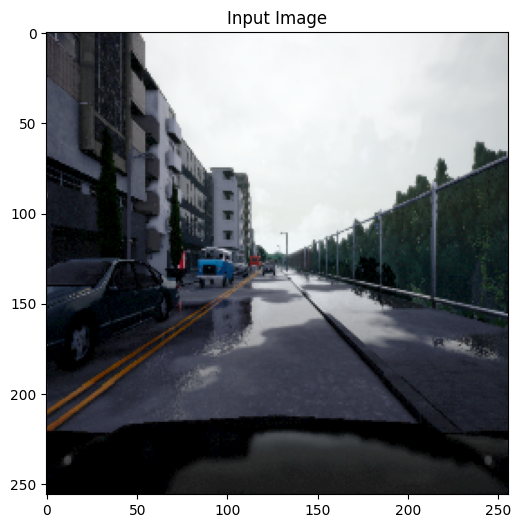

In [45]:
image_path = "02_00_131.png"

image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)
image = tf.image.resize(image, (256, 256))
image = tf.cast(image, tf.float32) / 255.0
display_image(image, title='Input Image')

1/1 [==============================] - 1s 1s/step
(256, 256, 1)


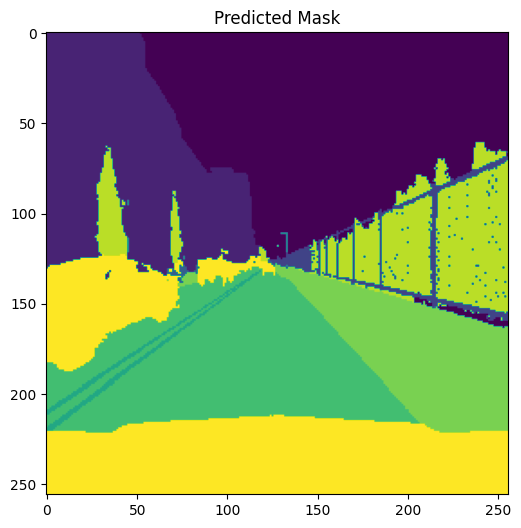

In [46]:
image = predict("02_00_131.png")
display_image(image[0], title='Predicted Mask')

1/1 [==============================] - 0s 290ms/step
(1, 256, 256, 1)


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (1, 256, 256, 1)

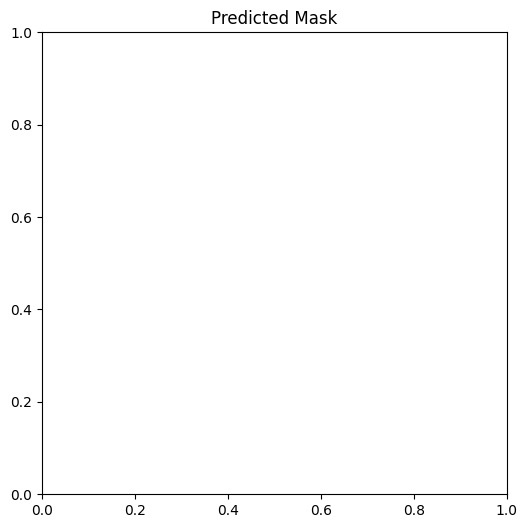

In [47]:
image = predict(image_path)
display_image(image, title='Predicted Mask')